# Data Modelling:

### 1. Load Train and Test dataset:

In [2]:
import pickle as pkl

with open("train.pkl", "rb") as f:
    X_train, y_train = pkl.load(f)

with open("test.pkl", "rb") as f:
    X_test, y_test = pkl.load(f)

### 2. Modelling the Train and Test Split:

#### 2.1. Training Different Classifiers for Classification:

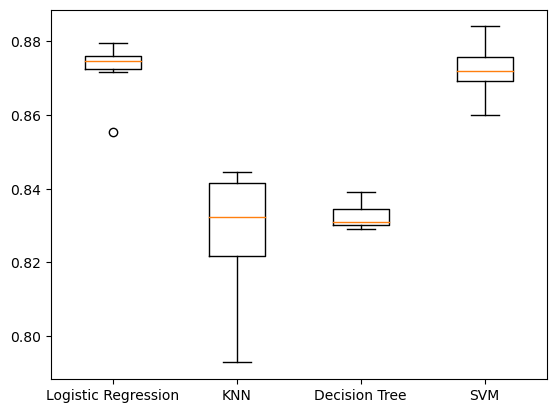

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {"Logistic Regression": LogisticRegression(solver = 'newton-cg', max_iter = 500, C = 1000),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "SVM": SVC(gamma='auto')
          }

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)


plt.boxplot(results, labels= models.keys())
plt.show()



#### 2.2. Check the Performance Metrics:

In [5]:
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.8848086586780054
KNN Test Set Accuracy: 0.8353304986470815
Decision Tree Test Set Accuracy: 0.8388094317742559
SVM Test Set Accuracy: 0.8763045999226904


From the Boxplot and the Accuracy score above, we see that Logistic model and Support Vector Machine has performed most consistently. So, in our modelling part we will consider Logistic Regression Model and SVM classifiers for our prediction.